In [1]:
# Useful for debugging
import numpy as np
%load_ext autoreload
%autoreload 2

# Xopt class, TNK test function

This is the class method for running Xopt. Use Bayesian exploration to explore the input space.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [2]:
# Import the class
from xopt import Xopt

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: null, verbose: true}

algorithm:
  name: bayesian_exploration
  options:
      initial_x: [[1.5, 1.5]]
      n_steps: 25
      verbose: True
      generator_options:                     ## options for bayesian exploration acquisition function
          batch_size: 1                      ## batch size for parallelized optimization
          #sigma: [[0.01, 0.0], [0.0,0.01]]   ## proximal biasing term
          use_gpu: False

  
simulation: 
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  
vocs:
  name: TNK_test
  description: null
  simulation: test_TNK
  templates: null
  variables:
    x1: [0, 2]
    x2: [0, 2]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: ['LESS_THAN', 0.5]
  linked_variables: {}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

if SMOKE_TEST:
    config['algorithm']['options']['n_steps'] = 3
    config['algorithm']['options']['generator_options']['num_restarts'] = 2
    config['algorithm']['options']['generator_options']['raw_samples'] = 2

In [4]:
X = Xopt(config)
X

INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.


{'variables': {'x1': [0, 2], 'x2': [0, 2]}, 'objectives': {'y1': 'None'}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'linked_variables': None, 'constants': {'a': 'dummy_constant'}}



            Xopt 
________________________________           
Version: 0.4.3+171.g6a7a693.dirty
Configured: True
Config as YAML:
xopt: {output_path: null, logging: 20}
algorithm:
  name: bayesian_exploration
  options:
    initial_x: &id001
    - [1.5, 1.5]
    n_steps: 25
    verbose: true
    generator_options: {batch_size: 1, use_gpu: false}
  function: xopt.bayesian.algorithms.bayesian_exploration
  initial_x: *id001
  n_steps: 25
  verbose: true
  generator_options: {batch_size: 1, use_gpu: false}
  n_initial_samples: 1
  output_path: null
  custom_model: null
  executor: null
  restart_file: null
simulation:
  name: test_TNK
  function: xopt.tests.evaluators.TNK.evaluate_TNK
  options: {templates: null, extra_option: abc}
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
vocs:
  variables:
    x1: [0, 2]
    x2: [0, 2]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: null
  constants: {a: dummy_constant}

# Run BayesOpt

In [5]:
# Pick one of these
from concurrent.futures import ThreadPoolExecutor as PoolExecutor
#from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [6]:
# Change max generations
X.run(executor=executor)

INFO:xopt.xopt:Starting at time 2021-09-27T09:40:55-05:00
INFO:xopt.bayesian.optimize:started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x000001B8CD6A93D0>
INFO:xopt.bayesian.optimize:submitting initial candidates at time 2021-09-27T09:40:55-05:00
INFO:xopt.bayesian.optimize:starting optimization loop
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:40:56-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:40:57-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:40:58-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:40:59-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:00-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:01-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:02-05:00
INFO:xopt.bayesian.optimize:submittin

# Plot
- plot input space samples -> yellow points satisfy constraints and purple points do not

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraint_status', 'feasibility', 'model', 'constraints', 'corrected_constraints'])


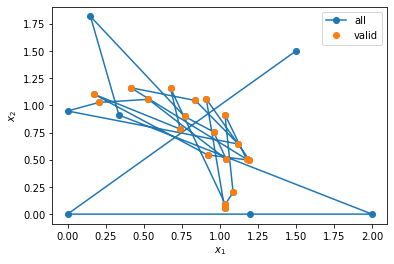

In [7]:


import matplotlib.pyplot as plt
%matplotlib inline

# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()

results = X.results
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o', label = 'all')
ax.plot(valid[:, 0], valid[:, 1], 'o', label = 'valid')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()

plt.show()

In [8]:
config = yaml.safe_load(YAML)
config['algorithm']['options']['generator_options']['sigma'] = \
    [[0.1, 0.0], [0.0,0.1]]

In [9]:
X2 = Xopt(config)
X2.run()


INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.xopt:Starting at time 2021-09-27T09:41:40-05:00
INFO:xopt.bayesian.optimize:started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x000001B8D5962BB0>
INFO:xopt.bayesian.optimize:submitting initial candidates at time 2021-09-27T09:41:40-05:00
INFO:xopt.bayesian.optimize:starting optimization loop


{'variables': {'x1': [0, 2], 'x2': [0, 2]}, 'objectives': {'y1': 'None'}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'linked_variables': None, 'constants': {'a': 'dummy_constant'}}


INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:41-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:43-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:44-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:45-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:46-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:47-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:48-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:50-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:52-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:53-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:55-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T09:41:5

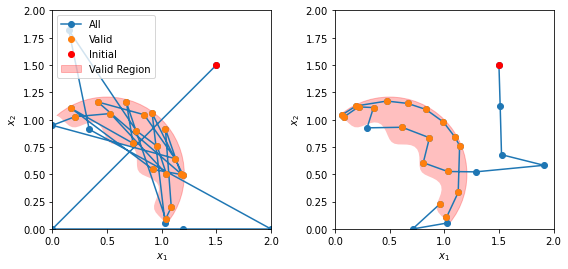

In [22]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
import numpy as np
fig2, axes = plt.subplots(1, 2)
fig2.set_size_inches(8,4)


for i, ele in enumerate([X, X2]):
    results = ele.results
    variables = results['variables']
    valid = results['variables'][results['feasibility'].flatten()]
    axes[i].plot(variables[:, 0], variables[:, 1], '-o', label = 'All')
    axes[i].plot(valid[:, 0], valid[:, 1], 'o', label = 'Valid')
    axes[i].plot(variables[0, 0], variables[0, 1], 'ro',
                 label = 'Initial')
    axes[i].set_xlabel('$x_1$')
    axes[i].set_ylabel('$x_2$')

    # plot valid region
    theta = np.linspace(0,np.pi/2)
    r = np.sqrt(1 + 0.1*np.cos(16*theta))
    x_1 = r*np.sin(theta)
    x_2_lower = r*np.cos(theta)
    x_2_upper = (0.5 - (x_1 - 0.5)**2)**0.5 + 0.5

    z = np.zeros_like(x_1)

    #ax2.plot(x_1, x_2_lower,'r')
    axes[i].fill_between(x_1, z, x_2_lower, fc='white')
    circle = plt.Circle((0.5, 0.5), 0.5**0.5,
                        color='r', alpha=0.25, zorder=0,
                        label='Valid Region')
    axes[i].add_patch(circle)
    axes[i].set_xlim(0, 2)
    axes[i].set_ylim(0, 2)
    axes[i].set_aspect('equal')
axes[0].legend(loc=2)
fig2.tight_layout()
fig2.savefig('proximal_example.svg')
plt.show()

In [15]:
# calculate travel distance
cases = []
for i, ele in enumerate([X, X2]):
    trial_dists = []
    n_trials = 25
    for n in range(n_trials):
        ele.run()

        results = ele.results
        variables = results['variables']

        dist = []
        for jj in range(1, len(variables)):
            dist += [np.linalg.norm(variables[jj] - variables[jj - 1])]

        trial_dists += [dist]

    cases += [trial_dists]

np.save('data.npy', np.array(cases))

INFO:xopt.xopt:Starting at time 2021-09-27T10:01:18-05:00
INFO:xopt.bayesian.optimize:started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x000001B8D6B40760>
INFO:xopt.bayesian.optimize:submitting initial candidates at time 2021-09-27T10:01:18-05:00
INFO:xopt.bayesian.optimize:starting optimization loop
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T10:01:19-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T10:01:20-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T10:01:21-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T10:01:22-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T10:01:22-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T10:01:24-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-27T10:01:25-05:00
INFO:xopt.bayesian.optimize:submittin

In [17]:
data = np.load('data.npy')
for ele in data:
    sums = np.sum(ele, axis = 1)
    print(sums)
    print(np.mean(sums))
    print(np.std(sums))

[21.97902369 18.54602606 18.55355231 21.94704183 19.24830004 19.23731346
 19.23784921 19.2431466  19.24331738 21.97702971 19.23416721 18.5476536
 19.25098729 21.94720114 21.67293085 21.65020207 21.97574919 19.23775354
 19.23977833 21.42439881 19.24694101 21.09136791 19.22773948 19.24442743
 19.23761243]
20.057660422862863
1.2927603372264909
[5.74868426 5.32878226 5.66768976 5.20079072 5.70371973 5.65182039
 5.88896946 5.10745024 5.24069727 7.14219585 5.85019277 6.55355618
 5.91106523 5.32954598 5.93295837 5.98721045 6.38740627 6.14402501
 5.88642006 6.36400333 5.7890156  6.42323334 5.93461641 5.90731763
 6.33593992]
5.89669225947176
0.4626753531627354
